In [1]:
'''
importing Pandas and Numpy library
'''

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# import openpyxl

'''
pandas set max display rows & columns

# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

'''
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
'''
Reading CSV file
'''
data = pd.read_csv("datasets/2wk_data.csv")
data.head(3)

,Admit Id,Name,T,R,A,C,K,BatchName,Last Status,Last Internal Rating,Techability Score,Learnability Score,Communicability Score,Avg TRACK Score,Present Percent,Overall Remarks,Unnamed: 16,Unnamed: 17,Unnamed: 18,Mapped to Company,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,CIC112020-7845,Mahesh Sahadev Kangude,0.82,0.94,0.94,0.82,0.70,CIC-238-Ahetesham-Nov26-TRACK-2.3,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,Yes,Req-Mediaqart-.NET-Dec19-103,NFP-039-Gunjan-022021-TRACK 2.1-DotNet,Deployed
1,CIC122020-1326,Sheevendra Singhraul,0.70,0.76,0.82,0.97,0.63,CIC-246-Ahetesham-Dec03-TRACK-2.3,Need Less Help,Meets expectations,1.40,1.61,0.94,3.95,1.0,"""Sheevendra"" is fine wit logics and good with ...",NaN,NaN,NaN,Yes,Req-Siemens-DevOps-Mar08-154,CFP-042-Vivek-032021-TRACK 2.1-DevOps,Irregular
2,CIC122020-7944,Nigar S,0.76,0.82,0.79,1.00,0.70,CIC-246-Ahetesham-Dec03-TRACK-2.3,Need Less Help,Meets expectations,1.46,1.61,1.00,4.07,1.0,"""Nigar"" is fine with programming concepts and ...",NaN,NaN,NaN,Yes,NaN,NFP-034-Dilip-012021-TRACK 2.1-Java,Dropped


In [3]:
# drop unwanted column with no header
data.drop(columns=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 20','Unnamed: 21','Unnamed: 22'],inplace=True)

In [4]:
data.columns

Index(['Admit Id', 'Name', 'T', 'R', 'A', 'C', 'K', 'BatchName', 'Last Status',
       'Last Internal Rating', 'Techability Score', 'Learnability Score',
       'Communicability Score', 'Avg TRACK Score', 'Present Percent',
       'Overall Remarks', 'Mapped to Company'],
      dtype='object')

In [5]:
data.shape

(1113, 17)

In [6]:
data.isna().sum()

Admit Id                 391
Name                     385
T                        534
R                        534
A                        534
C                        534
K                        534
BatchName                391
Last Status              590
Last Internal Rating     585
Techability Score        532
Learnability Score       532
Communicability Score    534
Avg TRACK Score          531
Present Percent          391
Overall Remarks          662
Mapped to Company        620
dtype: int64

In [7]:
'''
Drop NaN values created by blank extra rows
'''
data.dropna(subset=['Name'],inplace=True)

In [8]:
data.isna().sum()

Admit Id                   6
Name                       0
T                        149
R                        149
A                        149
C                        149
K                        149
BatchName                  6
Last Status              205
Last Internal Rating     200
Techability Score        147
Learnability Score       147
Communicability Score    149
Avg TRACK Score          146
Present Percent            6
Overall Remarks          277
Mapped to Company        235
dtype: int64

In [9]:
# Where Admit Id is NaN and all the entries are also blank
data[data['Admit Id'].isna()].to_excel('/home/nida/MRE/MRE/Analytics/All_nan.xlsx',index=False)

In [9]:
(data[(data['Avg TRACK Score'].isna()) & ~(data['K'].isna())]).shape

(71, 17)

In [11]:
data[(data['Avg TRACK Score'].isna()) & ~(data['K'].isna())].to_excel('/home/nida/MRE/MRE/Analytics/Avg_track_score_nan.xlsx',index=False)

In [12]:
batch = data[(data['Avg TRACK Score'].isna()) & ~(data['K'].isna())]
pd.Series(batch['BatchName'].unique()).to_frame().to_excel('/home/nida/MRE/MRE/Analytics/batch_with_nan_Avg_track.xlsx',index=False)
# len(batch['BatchName'].unique())

In [10]:
required_columns = list(set(data.columns)-set(['Overall Remarks']))
required_columns

['Last Internal Rating',
 'BatchName',
 'Communicability Score',
 'A',
 'Admit Id',
 'Techability Score',
 'C',
 'K',
 'Present Percent',
 'R',
 'Learnability Score',
 'Mapped to Company',
 'Name',
 'Last Status',
 'Avg TRACK Score',
 'T']

In [11]:
# create Dataframe with only required columns
required_data = data.filter(required_columns, axis=1)
required_data = required_data[['Admit Id','Name','BatchName','Avg TRACK Score','T','R','A','C','K','Last Internal Rating','Last Status','Techability Score', 'Communicability Score', 'Learnability Score', 'Present Percent','Mapped to Company']]
required_data.head()

,Admit Id,Name,BatchName,Avg TRACK Score,T,R,A,C,K,Last Internal Rating,Last Status,Techability Score,Communicability Score,Learnability Score,Present Percent,Mapped to Company
0,CIC112020-7845,Mahesh Sahadev Kangude,CIC-238-Ahetesham-Nov26-TRACK-2.3,NaN,0.82,0.94,0.94,0.82,0.70,NaN,NaN,NaN,NaN,NaN,0.80,Yes
1,CIC122020-1326,Sheevendra Singhraul,CIC-246-Ahetesham-Dec03-TRACK-2.3,3.95,0.70,0.76,0.82,0.97,0.63,Meets expectations,Need Less Help,1.40,0.94,1.61,1.00,Yes
2,CIC122020-7944,Nigar S,CIC-246-Ahetesham-Dec03-TRACK-2.3,4.07,0.76,0.82,0.79,1.00,0.70,Meets expectations,Need Less Help,1.46,1.00,1.61,1.00,Yes
3,CIC122020-7945,Nihar Ranjan Sahu,CIC-246-Ahetesham-Dec03-TRACK-2.3,3.65,0.70,0.73,0.76,0.76,0.70,Improvement needed,Need More Help,1.40,0.76,1.49,0.75,No
4,CIC092020-7949,Saikishore Gubbala,CIC-246-Ahetesham-Dec03-TRACK-2.3,4.76,0.94,0.94,1.00,1.00,0.88,Meets expectations,Need No Help,1.82,1.00,1.94,0.88,Yes


In [12]:
required_data.shape

(728, 16)

In [13]:
required_data.isna().sum()

Admit Id                   6
Name                       0
BatchName                  6
Avg TRACK Score          146
T                        149
R                        149
A                        149
C                        149
K                        149
Last Internal Rating     200
Last Status              205
Techability Score        147
Communicability Score    149
Learnability Score       147
Present Percent            6
Mapped to Company        235
dtype: int64

In [14]:
'''
Drop rows with all NaN except entries for Name
'''
required_data.dropna(subset=['Admit Id'],inplace=True)

In [15]:
required_data.isna().sum()

Admit Id                   0
Name                       0
BatchName                  0
Avg TRACK Score          140
T                        143
R                        143
A                        143
C                        143
K                        143
Last Internal Rating     194
Last Status              199
Techability Score        141
Communicability Score    143
Learnability Score       141
Present Percent            0
Mapped to Company        229
dtype: int64

In [16]:
'''
Fill Avg Track Score values for which T R A C K is present
'''
required_data['Avg TRACK Score'].fillna(required_data['T']+required_data['R']+required_data['A']+required_data['C']+required_data['K'],inplace=True)

In [17]:
# NaN values in percent
(required_data.isna().mean().round(4) * 100).sort_values(ascending=False)

Mapped to Company        31.72
Last Status              27.56
Last Internal Rating     26.87
Communicability Score    19.81
K                        19.81
C                        19.81
A                        19.81
R                        19.81
T                        19.81
Learnability Score       19.53
Techability Score        19.53
Avg TRACK Score           9.56
Present Percent           0.00
BatchName                 0.00
Name                      0.00
Admit Id                  0.00
dtype: float64

In [ ]:
required_data[required_data['T'].isna() & (required_data['Avg TRACK Score'].isna())]

In [19]:
'''
Remove rows where the Avg TRACK Score and T R A C K score both are NaN
'''
required_data.drop(required_data[required_data['T'].isna() & (required_data['Avg TRACK Score'].isna())].index,inplace=True)

In [20]:
# NaN values in percent
(required_data.isna().mean().round(4) * 100).sort_values(ascending=False)

Mapped to Company        25.88
Last Status              20.06
Last Internal Rating     19.30
Communicability Score    11.33
K                        11.33
C                        11.33
A                        11.33
R                        11.33
T                        11.33
Learnability Score       11.03
Techability Score        11.03
Present Percent           0.00
Avg TRACK Score           0.00
BatchName                 0.00
Name                      0.00
Admit Id                  0.00
dtype: float64

In [21]:
# 74 values in T R A C K
required_data.isna().sum()

Admit Id                   0
Name                       0
BatchName                  0
Avg TRACK Score            0
T                         74
R                         74
A                         74
C                         74
K                         74
Last Internal Rating     126
Last Status              131
Techability Score         72
Communicability Score     74
Learnability Score        72
Present Percent            0
Mapped to Company        169
dtype: int64

In [25]:
required_data.to_csv('/home/nida/MRE/MRE/Data_Preprocessing/wk2/stage2.csv',index=False)

In [22]:
# create new Dataframe to avoid modifying above required_data dataframe 
# Remove 74 NaN values in T R A C K 
df = required_data.copy()
df.dropna(subset=['T'],inplace=True)

In [23]:
df.isna().sum()

Admit Id                   0
Name                       0
BatchName                  0
Avg TRACK Score            0
T                          0
R                          0
A                          0
C                          0
K                          0
Last Internal Rating     118
Last Status              110
Techability Score         71
Communicability Score     72
Learnability Score        71
Present Percent            0
Mapped to Company        136
dtype: int64

In [24]:
# df['Mapped to Company'].fillna(value='No')
df['Mapped to Company'].value_counts()

No     240
Yes    203
Name: Mapped to Company, dtype: int64

In [25]:
# Fill NaN values in Mapped to Company as No
# df['Mapped to Company'].fillna(value='No',inplace=True)

# Removing NaN values in Mapped to Company
df.dropna(subset=['Mapped to Company'],inplace=True)

In [26]:
df['Mapped to Company'].value_counts()

No     240
Yes    203
Name: Mapped to Company, dtype: int64

In [27]:
# (df.isna().mean().round(4) * 100).sort_values(ascending=False)
df.isna().sum()

Admit Id                  0
Name                      0
BatchName                 0
Avg TRACK Score           0
T                         0
R                         0
A                         0
C                         0
K                         0
Last Internal Rating     26
Last Status              26
Techability Score        15
Communicability Score    16
Learnability Score       15
Present Percent           0
Mapped to Company         0
dtype: int64

In [28]:
# check Last Internal Rating spread in percentage
df_LIR = df[~(df['Last Internal Rating'].isna()) & (df['Mapped to Company']=='Yes')]
(df_LIR['Last Internal Rating'].value_counts()/df_LIR.shape[0])*100

Improvement needed      48.022599
Meets expectations      38.418079
Exceeds expectations    12.429379
Unsatisfactory           1.129944
Name: Last Internal Rating, dtype: float64

In [29]:
# Dropping 'Last Internal Rating' column and creating new dataframe df2
df2 = df.drop(columns=['Last Internal Rating'])

In [30]:
df2.isna().sum()

Admit Id                  0
Name                      0
BatchName                 0
Avg TRACK Score           0
T                         0
R                         0
A                         0
C                         0
K                         0
Last Status              26
Techability Score        15
Communicability Score    16
Learnability Score       15
Present Percent           0
Mapped to Company         0
dtype: int64

In [31]:
# Last status spread 
df2['Last Status'].value_counts()

Need Less Help    215
Need More Help    179
Need No Help       23
Name: Last Status, dtype: int64

In [32]:
# Drop Last Status column
df2.drop(columns=['Last Status'],inplace=True)

In [33]:
df2.isna().sum()
df2.shape

(443, 14)

In [41]:
# df2['Techability Score'].value_counts().sort_index(ascending=False)
# df2['Learnability Score'].value_counts().sort_index(ascending=False)
# df2['Communicability Score'].value_counts().sort_index(ascending=False)

In [34]:
'''
Fill column rows having null values with mean value of that column
Techability Score (Out of 2.0)
Learnability Score (Out of 2.0)
Communicability Score (Out of 1.0)
'''
# df2["Techability Score"].fillna(df2["Techability Score"].mean(), inplace = True)

# df2["Learnability Score"].fillna(df2["Learnability Score"].mean(), inplace = True)

# df2["Communicability Score"].fillna(df2["Communicability Score"].mean(), inplace =True)


'\nFill column rows having null values with mean value of that column\nTechability Score (Out of 2.0)\nLearnability Score (Out of 2.0)\nCommunicability Score (Out of 1.0)\n'

In [35]:
df2.dropna(subset=['Techability Score'],inplace=True)

In [36]:
df2.dropna(subset=['Communicability Score'],inplace=True)

In [37]:
# final dataframe with no imputation done and columns dropped for NaN values
df2.isna().sum()

Admit Id                 0
Name                     0
BatchName                0
Avg TRACK Score          0
T                        0
R                        0
A                        0
C                        0
K                        0
Techability Score        0
Communicability Score    0
Learnability Score       0
Present Percent          0
Mapped to Company        0
dtype: int64

In [38]:
df2.shape

(427, 14)

Text(0, 0.5, 'Counts')

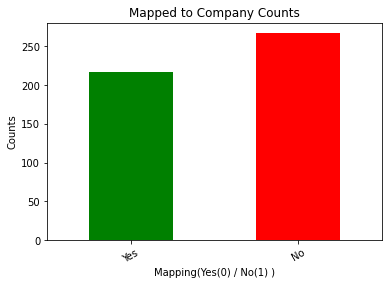

In [39]:
'''
Plot graph for how many is mapped to company
0 : Yes & 1 : No
'''
required_data["Mapped to Company"].value_counts().sort_values().plot(kind = 'bar', color=['green','red'])
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Mapped to Company Counts")
plt.xlabel("Mapping(Yes(0) / No(1) )")
plt.ylabel("Counts")

In [40]:
df2.columns

Index(['Admit Id', 'Name', 'BatchName', 'Avg TRACK Score', 'T', 'R', 'A', 'C',
       'K', 'Techability Score', 'Communicability Score', 'Learnability Score',
       'Present Percent', 'Mapped to Company'],
      dtype='object')

In [41]:
'''
select Required columns For Training Data

'''

data_column_list = ['Avg TRACK Score', 
                    'Present Percent', 
                    'Techability Score', 
                    'Learnability Score',
                    'Communicability Score', 
                    'T',
                    'R',
                    'A',
                    'C',
                    'K',
                    'Mapped to Company',
                    ]


processed_data = df2.filter(data_column_list, axis=1)
processed_data.head()

,Avg TRACK Score,Present Percent,Techability Score,Learnability Score,Communicability Score,T,R,A,C,K,Mapped to Company
1,3.95,1.00,1.40,1.61,0.94,0.70,0.76,0.82,0.97,0.63,Yes
2,4.07,1.00,1.46,1.61,1.00,0.76,0.82,0.79,1.00,0.70,Yes
3,3.65,0.75,1.40,1.49,0.76,0.70,0.73,0.76,0.76,0.70,No
4,4.76,0.88,1.82,1.94,1.00,0.94,0.94,1.00,1.00,0.88,Yes
5,4.31,0.63,1.52,1.79,1.00,0.82,0.79,1.00,1.00,0.70,Yes


In [42]:
processed_data.reset_index(drop=True,inplace=True)

In [43]:
processed_data.shape

(427, 11)

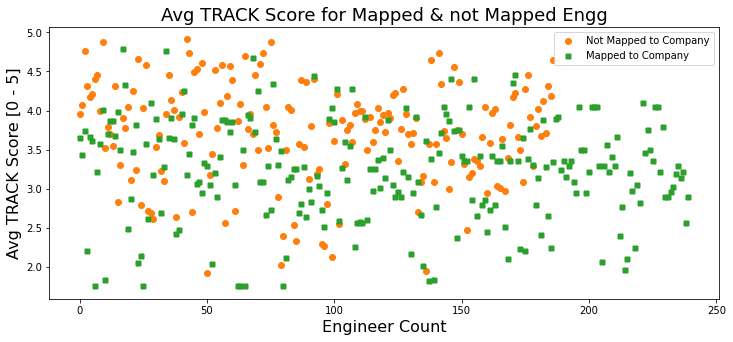

In [44]:
'''
Draw Scatter plot for Avg TRACK Score

'''

#figure, axis = plt.subplots(1, 2)

x1 = np.arange(len(processed_data[processed_data['Mapped to Company']=='Yes']))
y1 = processed_data[processed_data['Mapped to Company']=='Yes']['Avg TRACK Score']

x2 = np.arange(len(processed_data[processed_data['Mapped to Company']=='No']))
y2 = processed_data[processed_data['Mapped to Company']=='No']['Avg TRACK Score']

# axis[0].scatter(x=x1,y=y1)
# axis[1].scatter(x=x2,y=y2)

plt.figure(figsize=(12,5))
plt.scatter(x=x1,y=y1, color = 'tab:orange', label = "Not Mapped to Company")
plt.scatter(x=x2,y=y2, marker ='+', linewidths=5, color = 'tab:green', label = "Mapped to Company")

plt.title("Avg TRACK Score for Mapped & not Mapped Engg", fontsize=18)
plt.xlabel("Engineer Count" , fontsize=16)
plt.ylabel("Avg TRACK Score [0 - 5]" , fontsize=16)
plt.legend()

# plt.savefig('/home/nida/MRE/MRE/Analytics/Plot_wk2/Avg-TRACK-Score-plot.png')

plt.show()

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

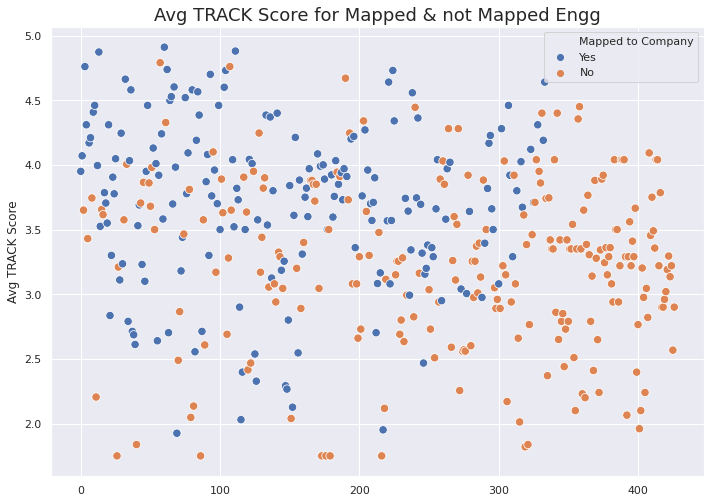

In [46]:
sns.scatterplot(y=df2['Avg TRACK Score'],x=processed_data.index,hue=df2['Mapped to Company'],s=70)
plt.title("Avg TRACK Score for Mapped & not Mapped Engg", fontsize=18)
plt.show()

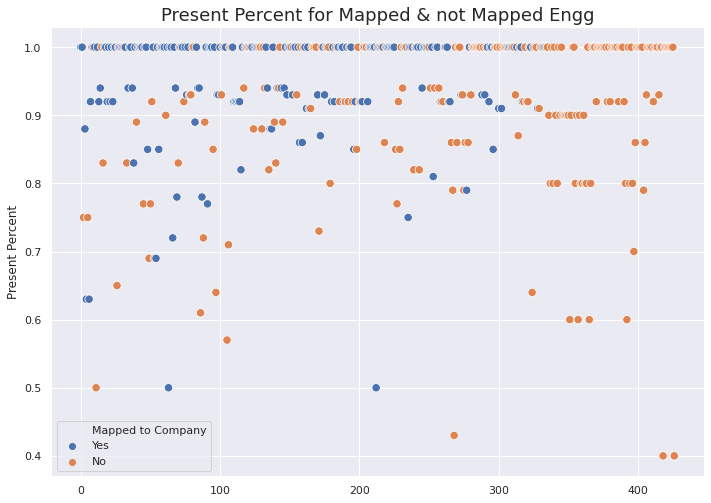

In [47]:
'''
Draw Scatter plot for Present Percent

'''
sns.scatterplot(y=processed_data['Present Percent'],x=processed_data.index,hue=processed_data['Mapped to Company'],s=70)
plt.title("Present Percent for Mapped & not Mapped Engg", fontsize=18)
plt.show()


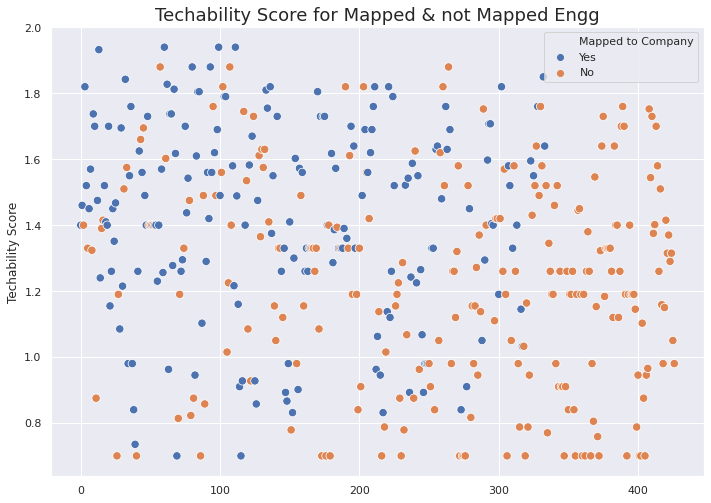

In [48]:
'''
Draw Scatter plot for Techability Score (Out of 2.0)

'''
sns.scatterplot(y=processed_data['Techability Score'],x=processed_data.index,hue=processed_data['Mapped to Company'],s=70)
plt.title("Techability Score for Mapped & not Mapped Engg", fontsize=18)
plt.show()


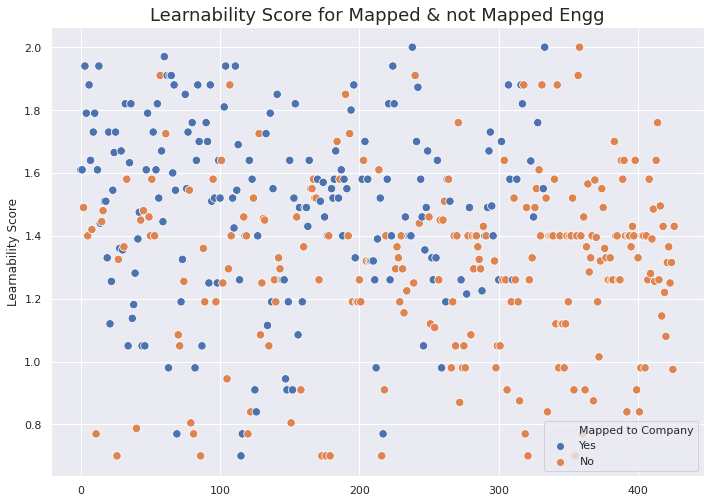

In [49]:
'''
Draw Scatter plot for Learnability Score (Out of 2.0)

'''
sns.scatterplot(y=processed_data['Learnability Score'],x=processed_data.index,hue=processed_data['Mapped to Company'],s=70)
plt.title("Learnability Score for Mapped & not Mapped Engg", fontsize=18)
plt.show()


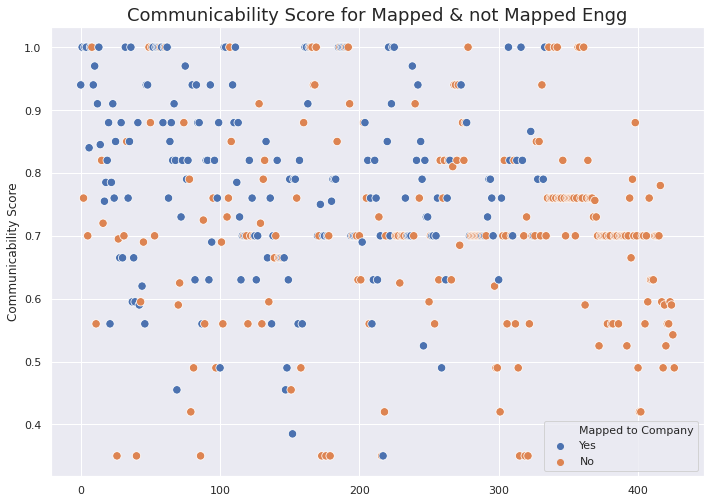

In [50]:
'''
Draw Scatter plot for Communicability Score (Out of 1.0)

'''
sns.scatterplot(y=processed_data['Communicability Score'],x=processed_data.index,hue=processed_data['Mapped to Company'],s=70)
plt.title("Communicability Score for Mapped & not Mapped Engg", fontsize=18)
plt.show()


# T-R-A-C-K seperate distribution 

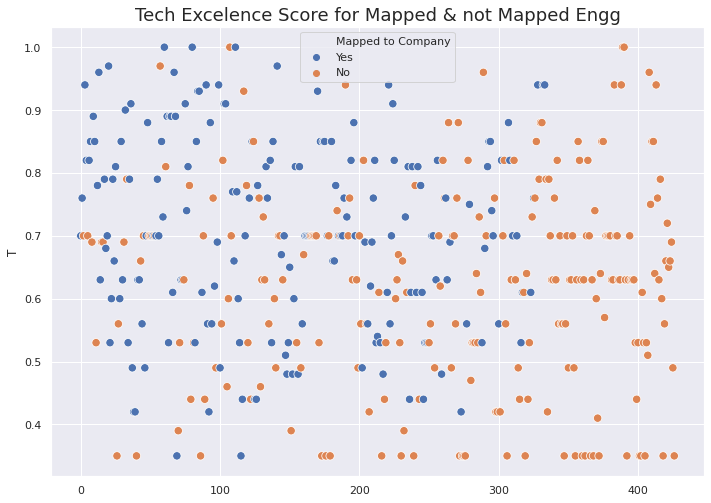

In [51]:
'''
Draw Scatter plot for Tech Excelence
'''
sns.scatterplot(y=processed_data['T'],x=processed_data.index,hue=processed_data['Mapped to Company'],s=70)
plt.title("Tech Excelence Score for Mapped & not Mapped Engg", fontsize=18)
plt.show()

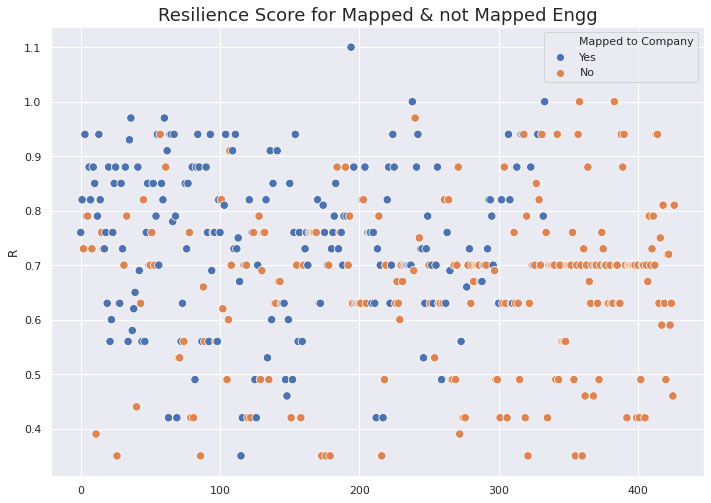

In [52]:
'''
Draw Scatter plot for Resilience
'''
sns.scatterplot(y=processed_data['R'],x=processed_data.index,hue=processed_data['Mapped to Company'],s=70)
plt.title("Resilience Score for Mapped & not Mapped Engg", fontsize=18)
plt.show()

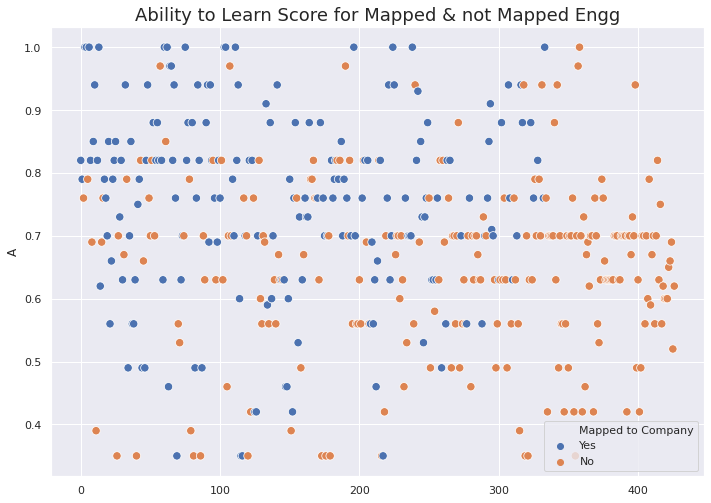

In [53]:
'''
Draw Scatter plot for Ability to Learn
'''
sns.scatterplot(y=processed_data['A'],x=processed_data.index,hue=processed_data['Mapped to Company'],s=70)
plt.title("Ability to Learn Score for Mapped & not Mapped Engg", fontsize=18)
plt.show()


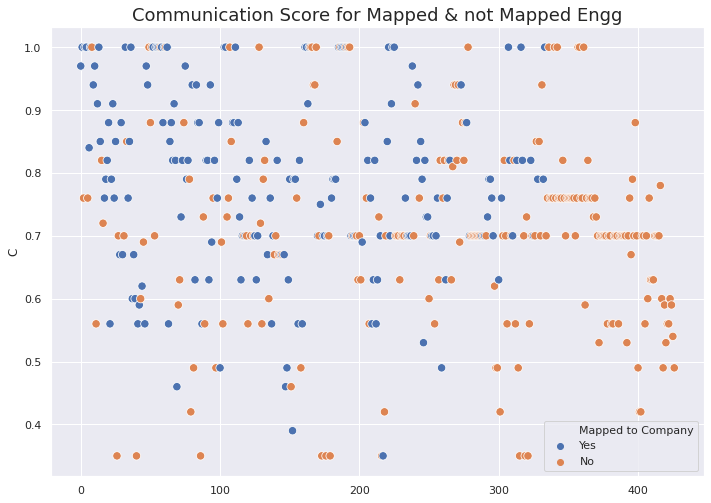

In [54]:
'''
Draw Scatter plot for Communication
'''
sns.scatterplot(y=processed_data['C'],x=processed_data.index,hue=processed_data['Mapped to Company'],s=70)
plt.title("Communication Score for Mapped & not Mapped Engg", fontsize=18)
plt.show()


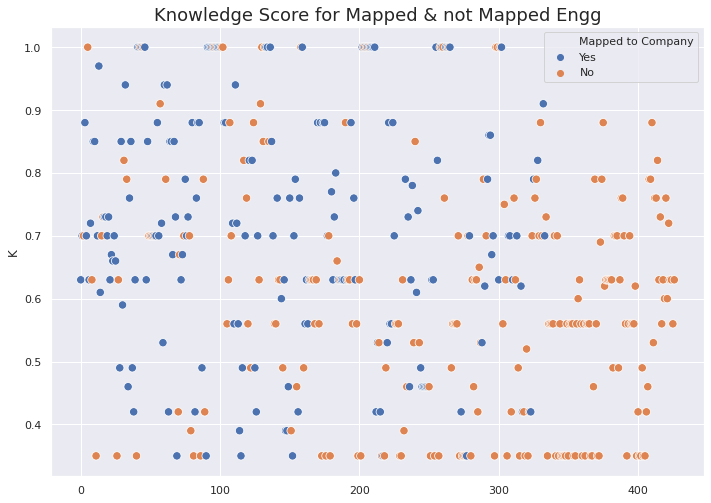

In [55]:
'''
Draw Scatter plot for Knowledge
'''
sns.scatterplot(y=processed_data['K'],x=processed_data.index,hue=processed_data['Mapped to Company'],s=70)
plt.title("Knowledge Score for Mapped & not Mapped Engg", fontsize=18)
plt.show()

In [56]:
processed_data['Mapped to Company'].replace({'Yes':1,'No':0},inplace=True)

In [57]:
processed_data.corr()

,Avg TRACK Score,Present Percent,Techability Score,Learnability Score,Communicability Score,T,R,A,C,K,Mapped to Company
Avg TRACK Score,1.000000,0.173660,0.898648,0.931467,0.758185,0.878291,0.879374,0.907796,0.760523,0.714326,0.342943
Present Percent,0.173660,1.000000,0.198757,0.156498,0.070009,0.193560,0.178994,0.131977,0.091022,0.158312,0.162316
Techability Score,0.898648,0.198757,1.000000,0.735504,0.487488,0.867860,0.700229,0.711593,0.492160,0.892464,0.307946
Learnability Score,0.931467,0.156498,0.735504,1.000000,0.724162,0.788067,0.955742,0.962622,0.729876,0.541602,0.326599
Communicability Score,0.758185,0.070009,0.487488,0.724162,1.000000,0.597482,0.654258,0.734140,0.989825,0.293790,0.279511
T,0.878291,0.193560,0.867860,0.788067,0.597482,1.000000,0.770297,0.741795,0.600223,0.585255,0.263471
R,0.879374,0.178994,0.700229,0.955742,0.654258,0.770297,1.000000,0.850489,0.654731,0.507729,0.300188
A,0.907796,0.131977,0.711593,0.962622,0.734140,0.741795,0.850489,1.000000,0.738248,0.542617,0.332047
C,0.760523,0.091022,0.492160,0.729876,0.989825,0.600223,0.654731,0.738248,1.000000,0.291540,0.261964
K,0.714326,0.158312,0.892464,0.541602,0.293790,0.585255,0.507729,0.542617,0.291540,1.000000,0.290316


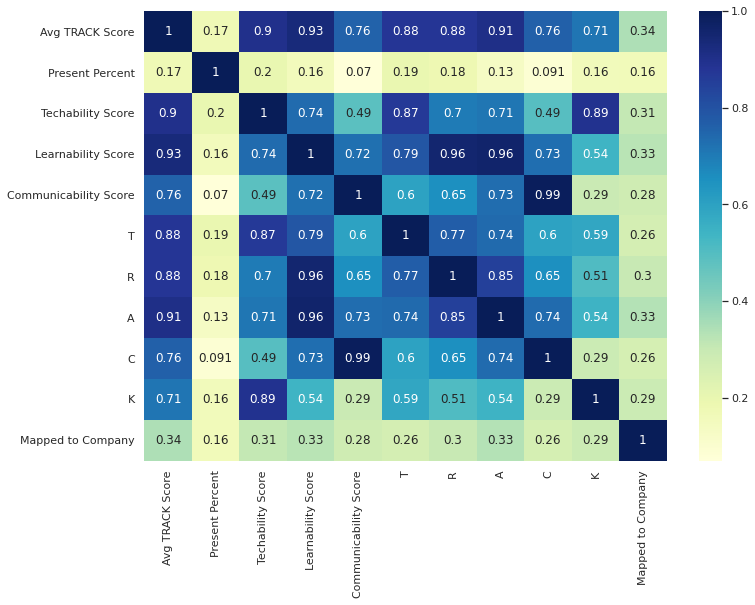

In [58]:
# plotting correlation heatmap
dataplot = sns.heatmap(processed_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [59]:
processed_data.columns

Index(['Avg TRACK Score', 'Present Percent', 'Techability Score',
       'Learnability Score', 'Communicability Score', 'T', 'R', 'A', 'C', 'K',
       'Mapped to Company'],
      dtype='object')

In [60]:
# pip install speedml

In [61]:
from speedml import Speedml
from sklearn.model_selection import train_test_split
X = processed_data[['Avg TRACK Score', 'Present Percent', 'Techability Score','Learnability Score', 'Communicability Score', 'T', 'R', 'A', 'C', 'K']].values
y = processed_data[['Mapped to Company']].values

In [62]:
# Divide the data into 70% in train.csv 30% in test.csv
ind_70 = int(round(processed_data.shape[0]*0.70,0))
print(ind_70)

299


In [63]:
train = processed_data[:ind_70]
test = processed_data[ind_70:]
test_f = processed_data[['Avg TRACK Score', 'Present Percent', 'Techability Score',
       'Learnability Score', 'Communicability Score', 'T', 'R', 'A', 'C', 'K']]

In [64]:
train.head()

,Avg TRACK Score,Present Percent,Techability Score,Learnability Score,Communicability Score,T,R,A,C,K,Mapped to Company
0,3.95,1.00,1.40,1.61,0.94,0.70,0.76,0.82,0.97,0.63,1
1,4.07,1.00,1.46,1.61,1.00,0.76,0.82,0.79,1.00,0.70,1
2,3.65,0.75,1.40,1.49,0.76,0.70,0.73,0.76,0.76,0.70,0
3,4.76,0.88,1.82,1.94,1.00,0.94,0.94,1.00,1.00,0.88,1
4,4.31,0.63,1.52,1.79,1.00,0.82,0.79,1.00,1.00,0.70,1


In [92]:
train.to_csv('/home/nida/MRE/MRE/Analytics/train.csv',index=False)

In [65]:
test_f.head()

,Avg TRACK Score,Present Percent,Techability Score,Learnability Score,Communicability Score,T,R,A,C,K
0,3.95,1.00,1.40,1.61,0.94,0.70,0.76,0.82,0.97,0.63
1,4.07,1.00,1.46,1.61,1.00,0.76,0.82,0.79,1.00,0.70
2,3.65,0.75,1.40,1.49,0.76,0.70,0.73,0.76,0.76,0.70
3,4.76,0.88,1.82,1.94,1.00,0.94,0.94,1.00,1.00,0.88
4,4.31,0.63,1.52,1.79,1.00,0.82,0.79,1.00,1.00,0.70


In [93]:
test_f.to_csv('/home/nida/MRE/MRE/Analytics/test.csv',index=False)

In [66]:
sml = Speedml('/home/nida/MRE/MRE/Analytics/train.csv', '/home/nida/MRE/MRE/Analytics/test.csv',target = 'Mapped to Company')

In [ ]:
sml.plot.correlate()
plt.figure(figsize=(15,5))
plt.show()

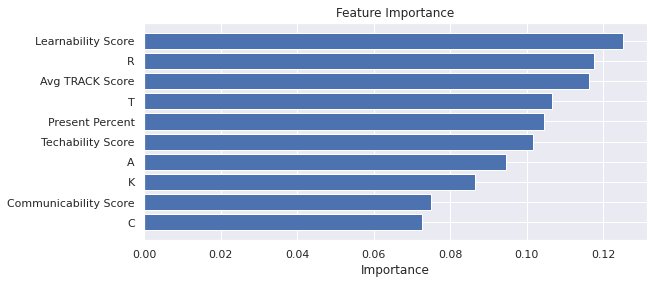

In [68]:
sml.plot.importance()

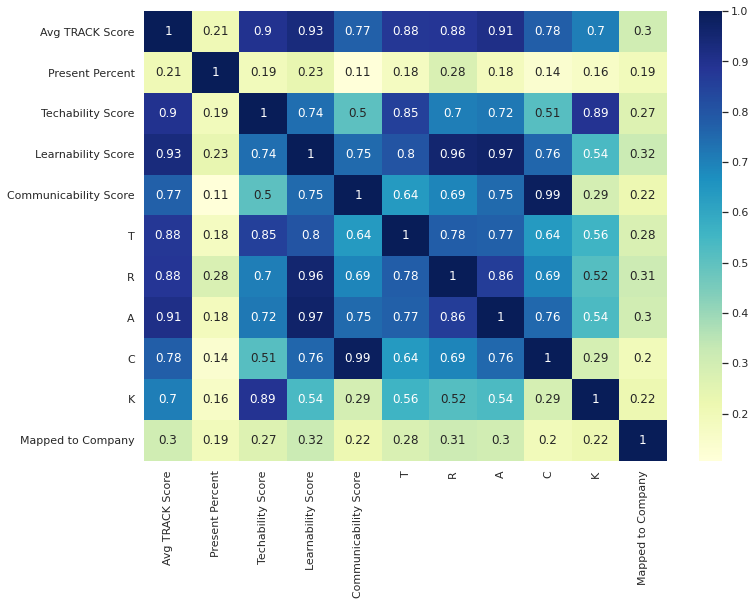

In [69]:
# plotting correlation heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# sns.set(rc={'figure.figsize':(10, 8)})

# sns.heatmap(processed_data[['Avg TRACK Score', 'Present Percent', 'Techability Score',
#        'Learnability Score', 'Communicability Score', 'T', 'R', 'A', 'C', 'K',
#        'Mapped to Company']].corr(),
#             annot=True,
#             fmt='.2f',
#             cmap='coolwarm')
# plt.show()

# Modelling

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [71]:
(processed_data['Mapped to Company'].value_counts()/processed_data.shape[0])*100

0    56.206089
1    43.793911
Name: Mapped to Company, dtype: float64

# Without sampling target data

In [72]:
x = processed_data.drop(['Mapped to Company'],axis=1)
y = processed_data['Mapped to Company']

In [76]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Logistic Regression

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_log= round(precision_score(Y_test, Y_pred) * 100, 2)
F1_log = round(f1_score(Y_test,Y_pred)*100,2)
Recall_log = round(recall_score(Y_test,Y_pred)*100,2)

LogisticRegression()

In [78]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Techability Score,1.092170
4,T,0.742792
0,Present Percent,0.612195
7,C,0.288627
8,K,0.177566
2,Learnability Score,0.019795
3,Communicability Score,-0.160091
6,A,-0.249593
5,R,-0.349149


# SVM

In [79]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_svc=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_svc = round(f1_score(Y_test,Y_pred)*100,2)
Recall_svc = round(recall_score(Y_test,Y_pred)*100,2)

SVC()

# KNN

In [80]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_knn=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_knn = round(f1_score(Y_test,Y_pred)*100,2)
Recall_knn = round(recall_score(Y_test,Y_pred)*100,2)

KNeighborsClassifier(n_neighbors=3)

# Gaussian Naive Bayes

In [81]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_guassian=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_guassian = round(f1_score(Y_test,Y_pred)*100,2)
Recall_guassian= round(recall_score(Y_test,Y_pred)*100,2)

GaussianNB()

# Perceptron

In [82]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_perceptron=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_perceptron = round(f1_score(Y_test,Y_pred)*100,2)
Recall_perceptron = round(recall_score(Y_test,Y_pred)*100,2)

Perceptron()

/home/nida/MRE/MRE_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Linear SVC

In [84]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_linear_svc=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_linear_svc = round(f1_score(Y_test,Y_pred)*100,2)
Recall_linear_svc = round(recall_score(Y_test,Y_pred)*100,2)

LinearSVC()

# Stochastic Gradient Descent

In [85]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_sgd=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_sgd = round(f1_score(Y_test,Y_pred)*100,2)
Recall_sgd = round(recall_score(Y_test,Y_pred)*100,2)

SGDClassifier()

# Decision Tree

In [86]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_decision_tree=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_decision_tree = round(f1_score(Y_test,Y_pred)*100,2)
Recall_decision_tree = round(recall_score(Y_test,Y_pred)*100,2)

DecisionTreeClassifier()

# Kfold

In [87]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)
rf_reg = RandomForestClassifier(criterion='gini')

In [89]:
scores = []
for i in range(12):
    result = next(kf.split(x), None)
    x_train = x.iloc[result[0]]
    x_test = x.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_reg.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.6511627906976745, 0.6744186046511628, 0.686046511627907, 0.7209302325581395, 0.6744186046511628, 0.6162790697674418, 0.6627906976744186, 0.7093023255813954, 0.5930232558139535, 0.6627906976744186, 0.6511627906976745, 0.6162790697674418]
Average K-Fold Score : 0.6598837209302327


In [90]:
accuracy_score(y_test,predictions)
acc_kfold_rf = round(accuracy_score(y_test,predictions) * 100, 2)
prec_kfold_rf=round(precision_score(y_test,predictions) * 100, 2)
F1_kfold_rf = round(f1_score(y_test,predictions)*100,2)
Recall_kfold_rf = round(recall_score(y_test,predictions)*100,2)

0.6162790697674418

In [91]:
precision_score(y_test,predictions)

0.59375

# Random Forest

In [92]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_random_forest=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_random_forest = round(f1_score(Y_test,Y_pred)*100,2)
Recall_random_forest = round(recall_score(Y_test,Y_pred)*100,2)

RandomForestClassifier()

0.9899328859060402

In [ ]:
from sklearn.ensemble import VotingClassifier
# from keras.models import Sequential
# from keras.layers import Dense

In [94]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [95]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, Y_train)
Y_pred=eclf1.predict(X_test)
acc_Voting_class = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_Voting_class=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_Voting_class = round(f1_score(Y_test,Y_pred)*100,2)
Recall_Voting_class = round(recall_score(Y_test,Y_pred)*100,2)

# XGB classifier

In [97]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train,Y_train)
pred_xgb=model_xgb.predict(X_test)
acc_xgb = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_xgb=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_xgb = round(f1_score(Y_test,Y_pred)*100,2)
Recall_xgb = round(recall_score(Y_test,Y_pred)*100,2)

[20:17:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nida/MRE/MRE_env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Adaboost classifier

In [98]:
model_ada=AdaBoostClassifier()
model_ada.fit(X_train,Y_train)
pred_ada=model_ada.predict(X_test)
acc_ada = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_ada=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_ada = round(f1_score(Y_test,Y_pred)*100,2)
Recall_ada = round(recall_score(Y_test,Y_pred)*100,2)

AdaBoostClassifier()

In [99]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','K_fold_RF','VotingClassifier','XGB','Adaboost'],
    'Acc_Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_kfold_rf,acc_Voting_class,acc_xgb,acc_ada],
    'Precision':[prec_svc, prec_knn, prec_log, 
              prec_random_forest, prec_guassian, prec_perceptron, 
              prec_sgd, prec_linear_svc, prec_decision_tree,prec_kfold_rf,prec_Voting_class,prec_xgb,prec_ada],
    'Recall':[Recall_svc, Recall_knn, Recall_log, 
              Recall_random_forest, Recall_guassian, Recall_perceptron, 
              Recall_sgd, Recall_linear_svc, Recall_decision_tree,Recall_kfold_rf,Recall_Voting_class,Recall_xgb,Recall_ada],
    'F1':[F1_svc, F1_knn, F1_log, F1_random_forest, F1_guassian, F1_perceptron, 
              F1_sgd, F1_linear_svc, F1_decision_tree,F1_kfold_rf,F1_Voting_class,F1_xgb,F1_ada]})
models.sort_values(by='Acc_Score', ascending=False)

,Model,Acc_Score,Precision,Recall,F1
4,Naive Bayes,76.74,69.01,85.96,76.56
10,VotingClassifier,76.74,72.88,75.44,74.14
11,XGB,76.74,72.88,75.44,74.14
12,Adaboost,76.74,72.88,75.44,74.14
2,Logistic Regression,73.64,70.91,68.42,69.64
7,Linear SVC,72.09,72.34,59.65,65.38
0,Support Vector Machines,71.32,83.33,43.86,57.47
3,Random Forest,67.44,65.31,56.14,60.38
1,KNN,64.34,59.32,61.40,60.34
9,K_fold_RF,61.63,59.38,48.72,53.52


# After sampling

Feature Data :  (480, 10)
Target Data :  (480,)


Text(0.5, 1.0, 'Balanced Data Set')

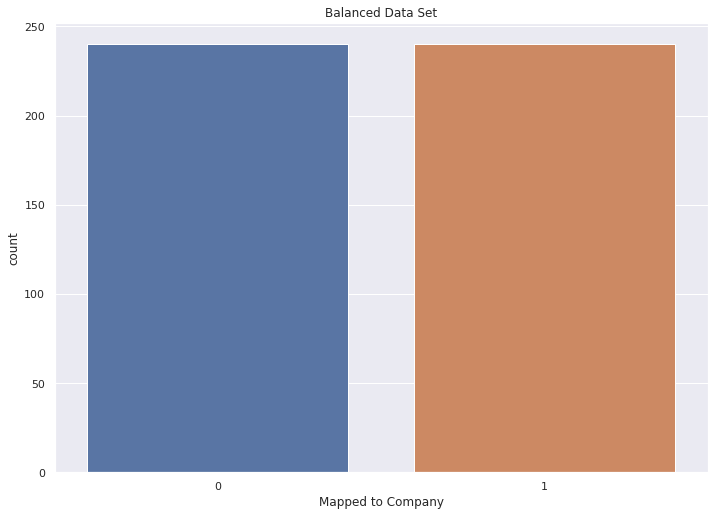

In [102]:
X = processed_data.drop(columns="Mapped to Company", axis=1)

# Specify target column
y = processed_data["Mapped to Company"]

# Import required library for resampling
from imblearn.over_sampling import RandomOverSampler
# Instantiate Random Under Sampler
oversampler = RandomOverSampler()

# Perform random under sampling
df_data, df_target = oversampler.fit_resample(X, y)

print("Feature Data : ",df_data.shape)
print("Target Data : ", df_target.shape)
# Visualize new classes distributions
sns.countplot(df_target).set_title('Balanced Data Set')

In [103]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [104]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_log= round(precision_score(Y_test, Y_pred) * 100, 2)
F1_log = round(f1_score(Y_test,Y_pred)*100,2)
Recall_log = round(recall_score(Y_test,Y_pred)*100,2)

LogisticRegression()

In [105]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Techability Score,1.092170
4,T,0.742792
0,Present Percent,0.612195
7,C,0.288627
8,K,0.177566
2,Learnability Score,0.019795
3,Communicability Score,-0.160091
6,A,-0.249593
5,R,-0.349149


In [106]:
# SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_svc=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_svc = round(f1_score(Y_test,Y_pred)*100,2)
Recall_svc = round(recall_score(Y_test,Y_pred)*100,2)

SVC()

In [107]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_knn=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_knn = round(f1_score(Y_test,Y_pred)*100,2)
Recall_knn = round(recall_score(Y_test,Y_pred)*100,2)

KNeighborsClassifier(n_neighbors=3)

In [108]:
# GNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_guassian=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_guassian = round(f1_score(Y_test,Y_pred)*100,2)
Recall_guassian= round(recall_score(Y_test,Y_pred)*100,2)

GaussianNB()

In [109]:
# perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_perceptron=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_perceptron = round(f1_score(Y_test,Y_pred)*100,2)
Recall_perceptron = round(recall_score(Y_test,Y_pred)*100,2)

Perceptron()

/home/nida/MRE/MRE_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
# linear_svc
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_linear_svc=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_linear_svc = round(f1_score(Y_test,Y_pred)*100,2)
Recall_linear_svc = round(recall_score(Y_test,Y_pred)*100,2)

LinearSVC()

In [111]:
# SGD
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_sgd=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_sgd = round(f1_score(Y_test,Y_pred)*100,2)
Recall_sgd = round(recall_score(Y_test,Y_pred)*100,2)

SGDClassifier()

In [112]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_decision_tree=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_decision_tree = round(f1_score(Y_test,Y_pred)*100,2)
Recall_decision_tree = round(recall_score(Y_test,Y_pred)*100,2)

DecisionTreeClassifier()

In [113]:
# Kfold
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)
rf_reg = RandomForestClassifier(criterion='gini')
scores = []
for i in range(12):
    result = next(kf.split(x), None)
    x_train = x.iloc[result[0]]
    x_test = x.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_reg.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.6976744186046512, 0.6976744186046512, 0.686046511627907, 0.6162790697674418, 0.5581395348837209, 0.686046511627907, 0.5813953488372093, 0.6162790697674418, 0.6395348837209303, 0.6976744186046512, 0.6976744186046512, 0.6627906976744186]
Average K-Fold Score : 0.6531007751937986


In [114]:
accuracy_score(y_test,predictions)
acc_kfold_rf = round(accuracy_score(y_test,predictions) * 100, 2)
prec_kfold_rf=round(precision_score(y_test,predictions) * 100, 2)
F1_kfold_rf = round(f1_score(y_test,predictions)*100,2)
Recall_kfold_rf = round(recall_score(y_test,predictions)*100,2)

0.6627906976744186

In [115]:
precision_score(y_test,predictions)

0.6486486486486487

In [117]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_random_forest=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_random_forest = round(f1_score(Y_test,Y_pred)*100,2)
Recall_random_forest = round(recall_score(Y_test,Y_pred)*100,2)

RandomForestClassifier()

0.9899328859060402

In [118]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, Y_train)
Y_pred=eclf1.predict(X_test)
acc_Voting_class = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_Voting_class=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_Voting_class = round(f1_score(Y_test,Y_pred)*100,2)
Recall_Voting_class = round(recall_score(Y_test,Y_pred)*100,2)

In [120]:
# XGB
model_xgb=XGBClassifier()
model_xgb.fit(X_train,Y_train)
pred_xgb=model_xgb.predict(X_test)
acc_xgb = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_xgb=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_xgb = round(f1_score(Y_test,Y_pred)*100,2)
Recall_xgb = round(recall_score(Y_test,Y_pred)*100,2)

[20:57:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nida/MRE/MRE_env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
# Adaboost
model_ada=AdaBoostClassifier()
model_ada.fit(X_train,Y_train)
pred_ada=model_ada.predict(X_test)
acc_ada = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_ada=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_ada = round(f1_score(Y_test,Y_pred)*100,2)
Recall_ada = round(recall_score(Y_test,Y_pred)*100,2)

AdaBoostClassifier()

In [124]:
models_after_sampling = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','K_fold_RF','VotingClassifier','XGB','Adaboost'],
    'Acc_Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_kfold_rf,acc_Voting_class,acc_xgb,acc_ada],
    'Precision':[prec_svc, prec_knn, prec_log, 
              prec_random_forest, prec_guassian, prec_perceptron, 
              prec_sgd, prec_linear_svc, prec_decision_tree,prec_kfold_rf,prec_Voting_class,prec_xgb,prec_ada],
    'Recall':[Recall_svc, Recall_knn, Recall_log, 
              Recall_random_forest, Recall_guassian, Recall_perceptron, 
              Recall_sgd, Recall_linear_svc, Recall_decision_tree,Recall_kfold_rf,Recall_Voting_class,Recall_xgb,Recall_ada],
    'F1':[F1_svc, F1_knn, F1_log, F1_random_forest, F1_guassian, F1_perceptron, 
              F1_sgd, F1_linear_svc, F1_decision_tree,F1_kfold_rf,F1_Voting_class,F1_xgb,F1_ada]})
models_after_sampling.sort_values(by='Acc_Score', ascending=False)

,Model,Acc_Score,Precision,Recall,F1
4,Naive Bayes,76.74,69.01,85.96,76.56
10,VotingClassifier,76.74,72.88,75.44,74.14
11,XGB,76.74,72.88,75.44,74.14
12,Adaboost,76.74,72.88,75.44,74.14
2,Logistic Regression,73.64,70.91,68.42,69.64
7,Linear SVC,72.09,72.34,59.65,65.38
0,Support Vector Machines,71.32,83.33,43.86,57.47
3,Random Forest,67.44,66.67,52.63,58.82
9,K_fold_RF,66.28,64.86,60.00,62.34
1,KNN,64.34,59.32,61.40,60.34


In [126]:
# Models before sampling
models.sort_values(by='Acc_Score', ascending=False)

,Model,Acc_Score,Precision,Recall,F1
4,Naive Bayes,76.74,69.01,85.96,76.56
10,VotingClassifier,76.74,72.88,75.44,74.14
11,XGB,76.74,72.88,75.44,74.14
12,Adaboost,76.74,72.88,75.44,74.14
2,Logistic Regression,73.64,70.91,68.42,69.64
7,Linear SVC,72.09,72.34,59.65,65.38
0,Support Vector Machines,71.32,83.33,43.86,57.47
3,Random Forest,67.44,65.31,56.14,60.38
1,KNN,64.34,59.32,61.40,60.34
9,K_fold_RF,61.63,59.38,48.72,53.52


In [131]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances 

,importance
feature,
Avg TRACK Score,0.153
Techability Score,0.117
Learnability Score,0.110
R,0.100
A,0.099
T,0.098
K,0.087
C,0.080
Present Percent,0.079


<AxesSubplot:xlabel='feature'>

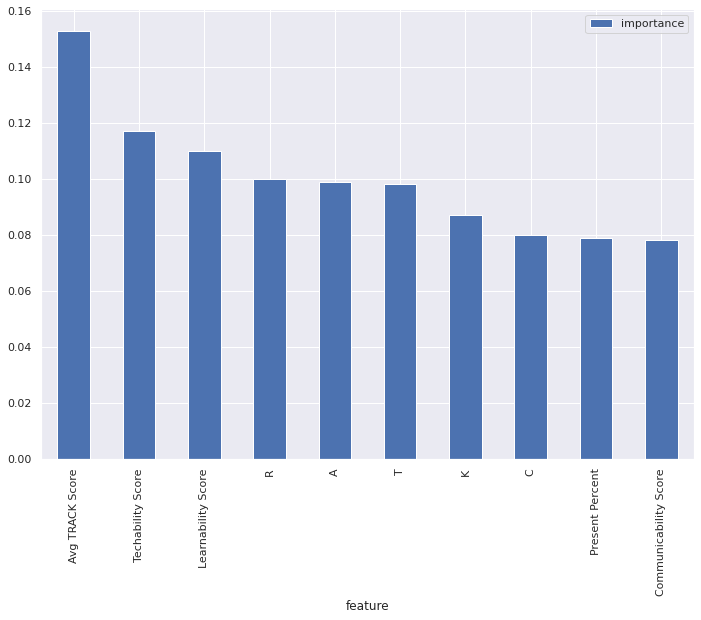

In [128]:
importances.plot.bar()